<h1> Project 1: Lane Detection </h1>
<ul>Tools are my disposal:
<li>Color_selection</li>
<li>Region of interest selection</li>
<li>Grayscaling</li>
<li>Gaussian Smoothing</li>
<li>Canny edge detection</li>
<li>Hough Transform line detection</li>
</ul>

First When we convert the image to grayscale we simply take off the RGB values and provide 1 value instead.
<li>Shape of image: (960, 540, 3)</li>
<li>Shape of gray: (960, 540)</li>
No 3rd dimension on Grayscale

<h1>Gaussian Blur</h1>

We then provide a Gaussian Blur to reduce noise/detail from the image. This process is the same as convolving the image with a Gaussian function. It smoothes out the edges.
<li>Shape of gray: (540, 960)</li>
<li>Shape of blur_gray: (540, 960)</li>
<li>Gaussian Blur also takes in a kernel_size. A larger kernel_size implies averaging over a larger area. They must be odd, typically 3 or 5 work well.</li>
<li> A ratio of 1:2 or 1:3 Low:High threshold is recommended.</li>


In [1]:
# Gaussian Blur
def apply_gaussian_blur(gray, kernel_size = 5):
    return gaussian_blur(gray, kernel_size)

Next we define parameters for the Canny function, which will take in an image, a low_threshold, and a high_threshold
<li>pixel values below low_threshold are discarded</li>
<li>pixel values above high_threshold are considered to be edges</li>
<li>pixel values between low and high thresholds are kept if they are touching a pixel above high threshold (edges)</li>

<h3>Canny Input</h3><h5>blur_gray (shape: (540,960)</h5>
<h3>Canny Output</h3><h5>edges (shape:(540, 960) </h5>


In [2]:
# Define Parameters for Canny
def apply_canny(blur_gray, low_threshold = 75, high_threshold = 175):
    # Apply Canny, changes pixel values to be either 0 (black) or 255 (white)
    return canny(blur_gray, low_threshold, high_threshold)

<h3>Image Mask / Region of interest</h3>
<p>Next we wish to apply an image mask to only consider lane lines in a surrounding polygon</p>
<p>Here we will use the <strong>cv2.fillPoly(mask, vertices, ignore_mask_color) function </strong></p>
<li>Input edges shape: (540, 960) Output: masked Image shape: (540, 960) </li>
<li>Function does not change input 'edges'</li>

<h1>TODO: Change Mask Parameters </h1>

In [21]:
def apply_mask(edges, image, gray):
    #make general shape of mask
    mask = np.zeros_like(edges)
    plt.imshow(edges, cmap="gray")
    # create ignore mask color = 255
    ignore_mask_color = 255 

    # create vertices for region
    imshape = image.shape
    
    # ------------------------------------------------------------------------
    #TODO: CREATE YOUR OWN VERTICES BY CHANGING THESE VARIABLES AND THE VERTICES OBJECT
    # hint: Consider changes that may occur if you are viewing a left-turn vs a right-turn
    # Should the mask be fixed to positional values or depend on image resolution?
    # ------------------------------------------------------------------------
    
    apex_left = [400, 355]
    apex_right = [imshape[1] - 380, 355]
    bottom_left = [175, imshape[0]]
    bottom_right = [imshape[1] - 39,imshape[0]]
    
    vertices = np.array([[(bottom_left[0],bottom_left[1]), \
                          (apex_left[0],apex_left[1]), \
                          (apex_right[0], apex_right[1]), \
                          (bottom_right[0], bottom_right[1])]], dtype=np.int32)

    ysize = image.shape[0]
    xsize = image.shape[1]
    
    # ------------------------------------------------------------------------
    # ------------------------------------------------------------------------

    # Polyfill the mask and do a bitwise_and to keep only edges in the region
    (masked_image, mask) = region_of_interest(edges, vertices)
    return masked_image

def plot_original_gray_blur(original, gray, blur):
    fig = plt.figure()

    a = fig.add_subplot(3,1,1)
    edgeplot = plt.imshow(original)
    a.set_title('Original')

    a = fig.add_subplot(3,1,2)
    a.set_title('gray')
    edgeplot = plt.imshow(gray, cmap="gray")

    a = fig.add_subplot(3,1,3)
    a.set_title('Blur')
    edgeplot = plt.imshow(blur, cmap="gray")
    plt.show()
    
def plot_mask(edges, image, masked_image):
    # PLOT
    fig = plt.figure()

    a = fig.add_subplot(3,1,1)
    edgeplot = plt.imshow(edges, cmap="gray")
    a.set_title('Edges')

    a = fig.add_subplot(3,1,2)
    a.set_title('Image')
    edgeplot = plt.imshow(image)

    a = fig.add_subplot(3,1,3)
    a.set_title('Masked Image')
    edgeplot = plt.imshow(masked_image, cmap="gray")
    plt.show()

<h3>Hough Lines</h3>
<li>Now that we have masked image Shape: (540, 960). We can use <strong>lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)</strong> to get a row vector of our lines</li>
<li>Copy the image to draw on <strong>line_image</strong> (row vecto with (x1,y1,x2,y2) as elements).</li>
<li>Iterate through the rows of lines, then grab each element (x1, y1, x2, and y2) and use <strong>cv2.line(<strong>line_image</strong>, pt1, pt2, color, thickness)</strong> to draw lines</li>

<h1> TODO: Change Hough Transform Parameters </h1>

In [22]:
def apply_hough(masked_image):
    
    # ------------------------------------------------------------------------
    # TODO Change Hough Transform Parameters to fit the image
    # ------------------------------------------------------------------------
    theta = np.pi/180     
    rho = 1
    threshold = 50
    min_line_len = 25
    max_line_gap = 125
    
    # ------------------------------------------------------------------------
    # ------------------------------------------------------------------------

    # Create a line image with hough lines on it
    hough_image, lines = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)
    
    return hough_image, lines
    # We gave line_image color when we copied the shape of mask_image and then added a 3rd dimension for our color space.
    # Then in draw_lines we input color = [255, 0, 0] so that will be red in this case. 
    # I changed the input color in draw_lines to [0, 255, 0] so we get green 

def plot_hough(hough_image, lines):
    fig = plt.figure()

    b = fig.add_subplot(2,1,1)
    edgeplot = plt.imshow(lines)
    b.set_title('Lines')

    b = fig.add_subplot(2,2,2)
    b.set_title('Hough Image')
    edgeplot = plt.imshow(hough_image)
    plt.show()

Now we have the line image. And we have the masked image/masked edges
The next step is to draw the line_image ontop of the masked_image
<li>Shape of masked_image: (540, 960)</li>
<li>Shape of line_image: (540,960, 3)...This one has color</li> 
<h5>Plot of line image vs mask image</h5>

In [5]:
def plot_mask_and_hough(masked_image, hough_image):
    fig = plt.figure()
    c = fig.add_subplot(1,2,1)
    edgeplot = plt.imshow(masked_image, cmap="gray")
    c.set_title('masked_image')

    c = fig.add_subplot(1,2,2)
    c.set_title('Hough_image')
    edgeplot = plt.imshow(hough_image)
    plt.show()

<h1>Overlay Hough Image</h1> 

In [6]:
# Img is the output of hough lines ==> lines_image
# initial_image is the color_edges, which is the initial edges image with a 3rd dimension for color
# Edges shape: (540, 960)
def apply_lines_edges_weighted(image, edges, hough_image):
    lines_edges_weighted = weighted_img(hough_image, image)
    return lines_edges_weighted

def plot_lines_edges_weighted_hough_and_original():
    # PLOT
    fig = plt.figure()
    d = fig.add_subplot(3,1,1)
    line_edgeplot = plt.imshow(hough_image)
    d.set_title('hough_image')

    d = fig.add_subplot(3,1,2)
    line_edgeplot = plt.imshow(color_edges)
    d.set_title('color_edges')

    d = fig.add_subplot(3,1,3)
    line_edgeplot = plt.imshow(lines_edges_weighted)
    d.set_title('lines_edges_weighted')

    plt.show()
    
def plot_weighted_image(lines_edges_weighted):
    plt.imshow(lines_edges_weighted)

<h1>Helper Functions</h1>

In [7]:
# Converts image to grayscale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applies canny transform
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

# Applies gaussian noise kernel, typically use kernel size of 3 or 5. (odd numbers only)
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:  #if it is 3 or 4 channels; RGB or RGBT
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count  #so you can fill multiple colors
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    # Because we just filled the mask matrix with vertices in the *fillPoly* function.
    masked_image = cv2.bitwise_and(img, mask)
    
    return (masked_image, mask)


def draw_lines(img, lines, color=[0, 255, 0], thickness=11):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    x1_values = lines[:, :, 0]
    y1_values = lines[:, :, 1]
    x2_values = lines[:, :, 2]
    y2_values = lines[:, :, 3]


    global prev_left_x_min
    global prev_left_x_max
    global prev_right_x_min
    global prev_right_x_max

    y_max = max(np.amax(y1_values), np.amax(y2_values))
    y_min = max(np.amin(y1_values), np.amin(y2_values))
    left_slopes = []
    right_slopes = []

    right_lane = []
    left_lane = []

    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)

#             if slope < 0:  #left lane has negative slope
            if (-0.9 < slope < -0.6):
                left_slopes.append(slope)
                left_lane.append(line)
            elif 0.45 < slope < 0.7: # right lane positive slope
                right_slopes.append(slope)
                right_lane.append(line)

    left_slopes_arr = np.array(left_slopes)
    right_slopes_arr = np.array(right_slopes)

    left_lines_arr = np.array(left_lane)
    right_lines_arr = np.array(right_lane)

    # Find average slopes
    left_lane_slope_average = np.mean(left_slopes_arr)  # type numpy.float64
    right_lane_slope_average = np.mean(right_slopes_arr)

    y_max = int(y_max)
    y_min = int(y_min)

    if len(left_lines_arr) > 0:
        # Compute Left lane intercept:
        y_intercept_left_lane_average = np.mean(left_lines_arr[:, :, 1] - (left_lines_arr[:, :, 0] * left_lane_slope_average))

        # Compute Left lane Xmax and Xmin:
        x_max_left = int((y_max - y_intercept_left_lane_average) / left_lane_slope_average)
        x_min_left = int((y_min - y_intercept_left_lane_average) / left_lane_slope_average)
            

        cv2.line(img, (x_max_left, y_max), (x_min_left, y_min), color, thickness)
        # Save last coordinates to keep line going
        
        prev_left_x_max = x_max_left
        prev_left_x_min = x_min_left

    else:
        
        if prev_left_x_max is not None:
            print('prev_left_x_max is not None')
            cv2.line(img, (prev_left_x_max, y_max),(prev_left_x_min, y_min), color, thickness)
        else:
            print('nothing')
            
    if len(right_lines_arr) > 0:
        # Compute Right Lane Intercept:
        y_intercept_right_lane_average = np.mean(right_lines_arr[:, :, 1] - (right_lines_arr[:, :, 0] * right_lane_slope_average))

        # Compute Right lane Xmax and Xmin:
        x_max_right = int((y_max - y_intercept_right_lane_average) / right_lane_slope_average)
        x_min_right = int((y_min - y_intercept_right_lane_average) / right_lane_slope_average)

        cv2.line(img, (x_max_right, y_max), (x_min_right, y_min), color, thickness)
        prev_right_x_max = x_max_right
        prev_right_x_min = x_min_right
    else:
        if prev_right_x_max is not None:
            print('prev_right_x_max is not NONE')
#         print("right_lines_arr is empty. Not drawing anything as there are no lines to choose from.")
            cv2.line(img, (prev_right_x_max, y_max), (prev_right_x_min, y_min), color, thickness)
        else:
            
            print('nothing right side empty')




def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        img shape will be 2D output from canny transform
    Returns an image with hough lines drawn.
    """
    hough_lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                                  maxLineGap=max_line_gap)

    # Create a line_img which we will ultimately draw on in our draw lines function
    # line_img will become zeros (540, 960, 3).
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)  #*before img.shape unpacks the tuple
    
    draw_lines(line_img, hough_lines)
    return (line_img, hough_lines)


def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)


In [8]:
# Save previous coordinates as global variables in case I don't detect any lines on the current frame
prev_left_x_min = None
prev_left_x_max = None
prev_right_x_min = None
prev_right_x_max = None

<h1>Image Processing</h1>

In [13]:
# Jonathan Mitchell
# Dec 5, 2016
# Self-Driving-Car Udacity Course Project 1: Lane Line Detection

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import os
images = os.listdir("test_images/")
print('images: ', images)

images:  ['whiteCarLaneSwitch.jpg', 'solidWhiteCurve.jpg', 'solidYellowCurve.jpg', 'solidYellowLeft.jpg', 'solidYellowCurve2.jpg', 'solidWhiteRight.jpg']


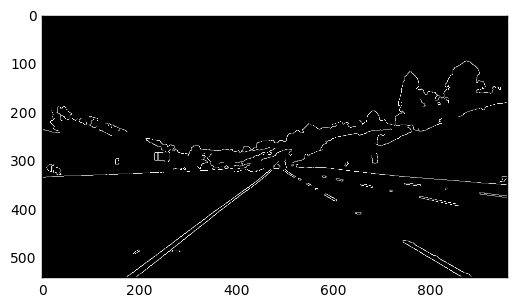

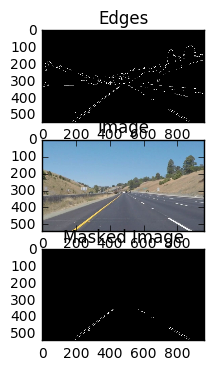

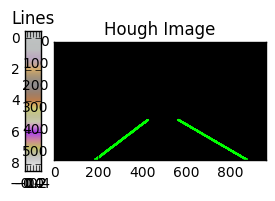

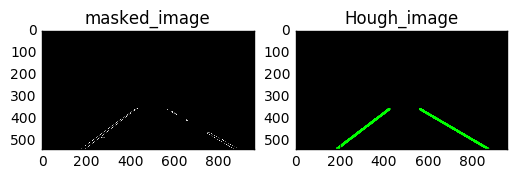

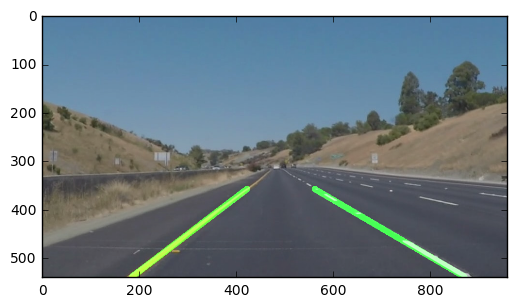

In [15]:
#reading in an image
def readImage(image):
    image = mpimg.imread('test_images/' + image)
    gray = grayscale(image)
    blur_gray = apply_gaussian_blur(gray)
    edges = apply_canny(blur_gray)
    masked_image = apply_mask(edges, image, gray)
    hough_image, lines = apply_hough(masked_image)
    lines_edges_weighted = apply_lines_edges_weighted(image, edges, hough_image)
    plot_mask(edges, image, masked_image)
    plot_hough(hough_image, lines)
    plot_mask_and_hough(masked_image, hough_image)
    plot_weighted_image(lines_edges_weighted)
    return lines_edges_weighted

readImage(images[0])
# Read in one image and output the result
def readAllImages(images):
    for img in images:
        result = readImage(img)
        mpimg.imsave('results_rendered/' + '-ChangedParameters--'+img, result)

<h1>Video Processing:</h1> Attempt once you have finished Image Processing for 3 test_images

In [16]:
def process_image(image):
    gray = grayscale(image)
    blur_gray = apply_gaussian_blur(gray)
    edges = apply_canny(blur_gray)
    masked_image = apply_mask(edges, image, gray)
    hough_image, lines = apply_hough(masked_image)
    lines_edges_weighted = apply_lines_edges_weighted(image, edges, hough_image)
    return lines_edges_weighted

[MoviePy] >>>> Building video submit-solidWhiteRightx2.mp4
[MoviePy] Writing video submit-solidWhiteRightx2.mp4


  2%|▏         | 4/222 [00:00<00:06, 33.75it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


  5%|▍         | 11/222 [00:00<00:05, 39.33it/s]

prev_left_x_max is not None
prev_left_x_max is not None


 11%|█▏        | 25/222 [00:00<00:03, 49.45it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 17%|█▋        | 37/222 [00:00<00:03, 53.52it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 19%|█▉        | 43/222 [00:00<00:03, 52.22it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 22%|██▏       | 49/222 [00:00<00:03, 47.98it/s]

prev_left_x_max is not None
prev_left_x_max is not None


 24%|██▍       | 54/222 [00:01<00:03, 45.18it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 29%|██▉       | 64/222 [00:01<00:03, 41.14it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 31%|███       | 69/222 [00:01<00:03, 42.66it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 33%|███▎      | 74/222 [00:01<00:03, 40.07it/s]

prev_left_x_max is not None
prev_left_x_max is not None


 36%|███▌      | 79/222 [00:01<00:03, 37.80it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 37%|███▋      | 83/222 [00:01<00:04, 32.84it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 39%|███▉      | 87/222 [00:01<00:04, 32.69it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 41%|████      | 91/222 [00:02<00:03, 34.06it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 43%|████▎     | 95/222 [00:02<00:04, 31.38it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 45%|████▍     | 99/222 [00:02<00:04, 29.90it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 47%|████▋     | 104/222 [00:02<00:03, 33.10it/s]

prev_left_x_max is not None
prev_left_x_max is not None


 49%|████▊     | 108/222 [00:02<00:03, 31.62it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 50%|█████     | 112/222 [00:02<00:03, 32.26it/s]

prev_left_x_max is not None
prev_left_x_max is not None


 52%|█████▏    | 116/222 [00:02<00:03, 30.81it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 54%|█████▍    | 120/222 [00:03<00:03, 32.76it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 56%|█████▋    | 125/222 [00:03<00:02, 34.41it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 62%|██████▏   | 138/222 [00:03<00:02, 33.17it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 68%|██████▊   | 150/222 [00:04<00:02, 24.89it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 71%|███████   | 158/222 [00:04<00:02, 28.85it/s]

prev_left_x_max is not None


 74%|███████▍  | 165/222 [00:04<00:02, 27.40it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 80%|███████▉  | 177/222 [00:04<00:01, 29.39it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 86%|████████▋ | 192/222 [00:05<00:00, 32.09it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 92%|█████████▏| 204/222 [00:05<00:00, 34.34it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


 95%|█████████▌| 212/222 [00:05<00:00, 34.89it/s]

prev_left_x_max is not None
prev_left_x_max is not None
prev_left_x_max is not None


100%|█████████▉| 221/222 [00:06<00:00, 35.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: submit-solidWhiteRightx2.mp4 

CPU times: user 13 s, sys: 96 ms, total: 13.1 s
Wall time: 6.71 s


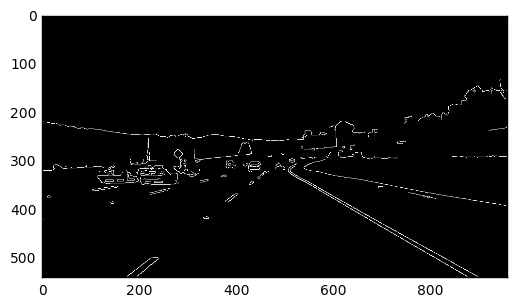

In [17]:
# Test on solidWhite
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'submit-solidWhiteRightx2.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [15]:
# Test on solid yellow left
yellow_output = 'submit-solidYellowLeftTestx2.mp4'
clip2 = VideoFileClip("solidYellowLeft.mp4")
yellow_clip = clip2.fl_image(process_image) #NOTE: this function expects color images!!
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [18]:
# Challenge output
challenge_output = 'submit-challengeTestx2.mp4'
clip3 = VideoFileClip('challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

To improve performance consider using a Least Squares Approximation, RANSAC, or Exponential Moving Average when drawing lines